# Model Selection - Implicit Differences

In this notebook, a linear regression, an elastic net regression and a multilayer perceptron (MLP) are trained. First, the training data is split in 5 folds, which are used for the model selection. Once the best model is found, it is retrained with all the training data and evaluated in the test data.

The feautures used in this case are the **increments in EUR/BGP** mid prices and the **difference** between the EUR/GBP mid price and the mid price implied from EUR/USD and GBP/USD. For each point of time the last 200 updates are considered. Particularly, 9 differents EWMA's are included instead of considering all 200 past updates. The **EWMAs** represented windows of **1, 2, 3, 5, 10, 25, 50, 100, 200** observations. Our aim is to predict the accumulated increment after 5, 10, and 20 updates.

Remark that only data between 7 AM and 7 PM is considered, and the values with spreads over 99.95 percentile are dropped.

In [1]:
from src.data.constants import Currency, ROOT_DIR
from src.models.model_selection import ModelTrainer
from src.models import model_utils, train_model
from src.visualization.plot_results import PlotCoefsModel
from typing import Tuple, List, NoReturn, Union

import logging
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


log = logging.getLogger("Model trainer")

In [2]:
logging.basicConfig(
    level=logging.DEBUG, 
    filename=ROOT_DIR + "/logs/training.log",
    format='%(asctime)s | %(name)s | %(levelname)s | %(message)s')

train_period = '2020-04-05', '2020-04-11'
test_period = '2020-04-12', '2020-04-18'
feature_variables = ['increment', 'difference']
pair = "EURGBP"
aux = 'USD'
freqs = [1, 2, 3, 5, 10, 25, 50, 100, 200]
horizons = [5, 10, 20]

In [3]:
def show_results_model(model: str, metric: str):
    """ Function to show the results when performing GridSearchCV for the model selection.

    Args:
        model (str): name of the model to consider.
        metric (str): name of the metric to show. Choices are: mean_squared_error, r2, 
        explained_variance, mean_absolute_error and max_error.
    """
    variables = "_".join(feature_variables)
    path = f"{ROOT_DIR}/models/features/{model}/{pair}/{aux}/{variables}/"
    filenames = [f"{path}model_sel_{model}_{pair}_200-{h}_20200405-20200411.csv" for h in horizons]
    for i, filename in enumerate(filenames):
        print(f"Showing results when considering horizon of {horizons[i]} observations.")
        df = pd.read_csv(filename, index_col=0).drop('params', axis=1)
        columns = list(filter(lambda x: ('split' not in x) and ((metric in x) or ('param' in x)), df.columns))
        print(df[columns])

In [ ]:
train_model.train(
    Currency.EUR, Currency.GBP, "regressions", freqs, [5, 10, 20], 
    train_period, test_period, (Currency.USD, ), 
    variables=feature_variables, 
    variables_to_drop=['implicit_increment'])

In [5]:
show_results_model('ElasticNet', 'r2')

Showing results when considering horizon of 5 observations.
    param_alpha  param_l1_ratio  mean_test_r2  std_test_r2  rank_test_r2
0           0.0            0.00      0.046999     0.012003             1
1           0.0            0.25      0.046999     0.012003             1
2           0.0            0.50      0.046999     0.012003             1
3           0.0            0.75      0.046999     0.012003             1
4           0.0            1.00      0.046999     0.012003             1
5           0.2            0.00      0.004789     0.001593             6
6           0.2            0.25     -0.000032     0.000029            10
7           0.2            0.50     -0.000032     0.000029            10
8           0.2            0.75     -0.000032     0.000029            10
9           0.2            1.00     -0.000032     0.000029            10
10          0.4            0.00      0.002596     0.000835             7
11          0.4            0.25     -0.000032     0.000029      

29/200
19288/19288 - 16s - loss: 0.1686
Epoch 130/200
19288/19288 - 16s - loss: 0.1686
Epoch 131/200
19288/19288 - 16s - loss: 0.1686
Epoch 132/200
19288/19288 - 16s - loss: 0.1686
Epoch 133/200
19288/19288 - 16s - loss: 0.1686
Epoch 134/200
19288/19288 - 16s - loss: 0.1686
Epoch 135/200
19288/19288 - 16s - loss: 0.1686
Epoch 136/200
19288/19288 - 16s - loss: 0.1686
Epoch 137/200
19288/19288 - 16s - loss: 0.1686
Epoch 138/200
19288/19288 - 16s - loss: 0.1686
Epoch 139/200
19288/19288 - 16s - loss: 0.1686
Epoch 140/200
19288/19288 - 16s - loss: 0.1686
Epoch 141/200
19288/19288 - 15s - loss: 0.1686
Epoch 142/200
19288/19288 - 16s - loss: 0.1686
Epoch 143/200
19288/19288 - 15s - loss: 0.1686
Epoch 144/200
19288/19288 - 15s - loss: 0.1686
Epoch 145/200
19288/19288 - 15s - loss: 0.1686
Epoch 146/200
19288/19288 - 16s - loss: 0.1686
Epoch 147/200
19288/19288 - 16s - loss: 0.1685
Epoch 148/200
19288/19288 - 16s - loss: 0.1686
Epoch 149/200
19288/19288 - 15s - loss: 0.1686
Epoch 150/200
19288/

<Figure size 864x648 with 0 Axes>

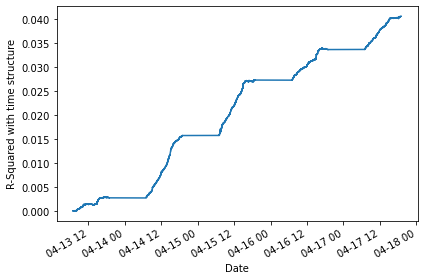

<Figure size 864x648 with 0 Axes>

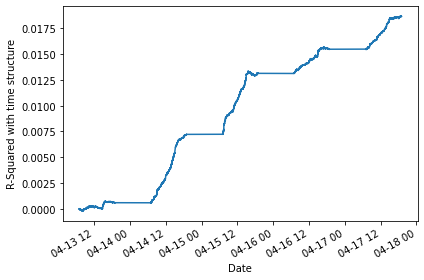

<Figure size 864x648 with 0 Axes>

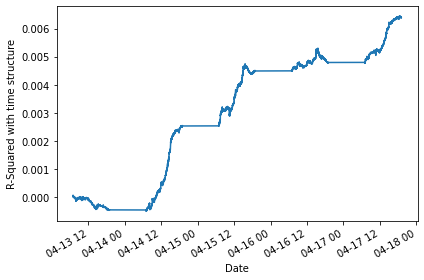

In [6]:
train_model.train(
    Currency.EUR, Currency.GBP, "mlp", freqs, [5, 10, 20], 
    train_period, test_period, (Currency.USD, ), 
    variables=feature_variables, variables_to_drop=['implicit_increment'])

In [8]:
show_results_model('MultiLayerPerceptron', 'r2')

Showing results when considering horizon of 5 observations.
  param_f_act        param_n_neurons  mean_test_r2  std_test_r2  rank_test_r2
0        relu  [32, 64, 128, 64, 32]      0.028128     0.018744             3
1        relu           [32, 64, 32]      0.033638     0.015122             1
2        relu          [32, 128, 32]      0.031204     0.014482             2
Showing results when considering horizon of 10 observations.
  param_f_act        param_n_neurons  mean_test_r2  std_test_r2  rank_test_r2
0        relu  [32, 64, 128, 64, 32]      0.009283     0.010710             2
1        relu           [32, 64, 32]      0.012553     0.007265             1
2        relu          [32, 128, 32]      0.009064     0.009133             3
Showing results when considering horizon of 20 observations.
  param_f_act        param_n_neurons  mean_test_r2  std_test_r2  rank_test_r2
0        relu  [32, 64, 128, 64, 32]     -0.014105     0.018838             2
1        relu           [32, 64, 32]  

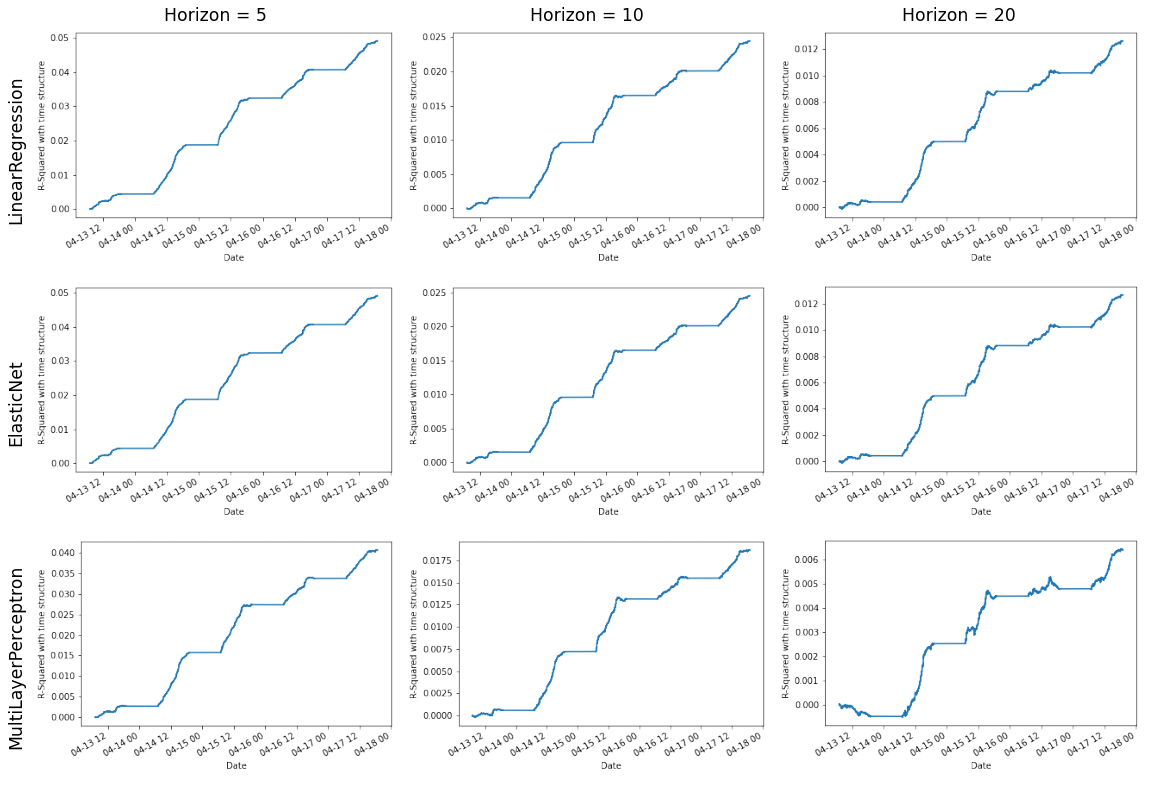

In [9]:
models = ['LinearRegression', 'ElasticNet', 'MultiLayerPerceptron']
n_rows = len(models)
n_cols = len(horizons)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 14), gridspec_kw={'hspace': 0, 'wspace': 0})

for col, horizon in enumerate(horizons):
    for row, model in enumerate(models):
        image_path = f"{ROOT_DIR}/reports/models/features/{model}/EURGBP/USD/increment_difference/"
        image_filename = f"plot_r2time_{model}_EURGBP_200-{horizon}_20200405-20200411.png"
        img = mpimg.imread(image_path + image_filename)
        axs[row, col].imshow(img)
        axs[row, col].spines["right"].set_visible(False)
        axs[row, col].spines["left"].set_visible(False)
        axs[row, col].spines["top"].set_visible(False)
        axs[row, col].spines["bottom"].set_visible(False)
        axs[row, col].get_xaxis().set_ticks([])
        axs[row, col].get_yaxis().set_ticks([])
        if row == 0:
            axs[row, col].set_xlabel(f"Horizon = {horizon}", fontsize='xx-large')
            axs[row, col].xaxis.set_label_position('top') 
        if col == 0:
            axs[row, col].set_ylabel(model, rotation=90, fontsize='xx-large')

plt.show()

/home/mario/miniconda3/envs/dl-fx-forecasting/lib/python3.9/site-packages/src/visualization/plot_results.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


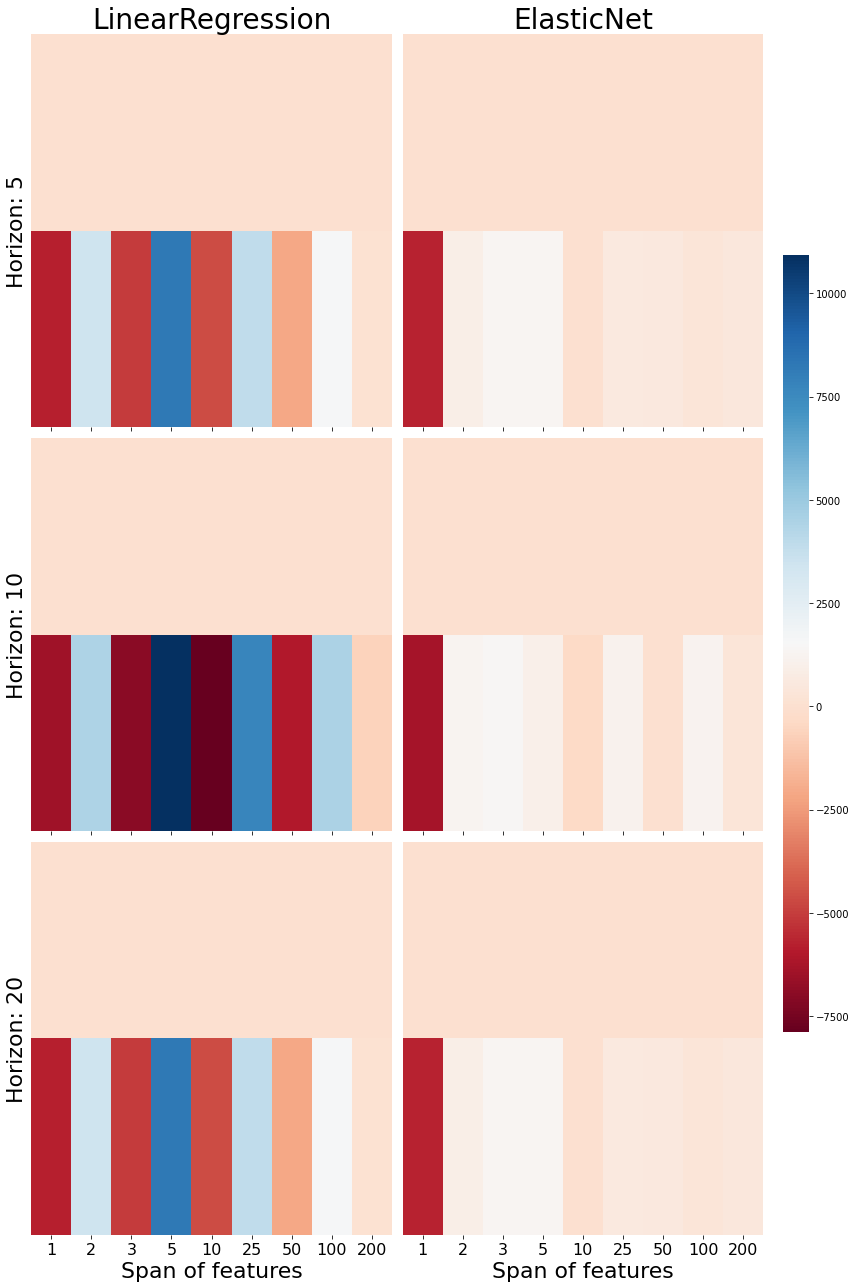

In [10]:
plotter = PlotCoefsModel("EURGBP", "features", ['increment', 'difference'], "USD")
plotter.get_coefs()

/home/mario/miniconda3/envs/dl-fx-forecasting/lib/python3.9/site-packages/src/visualization/plot_results.py:142: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  results = yaml.load(results_file)


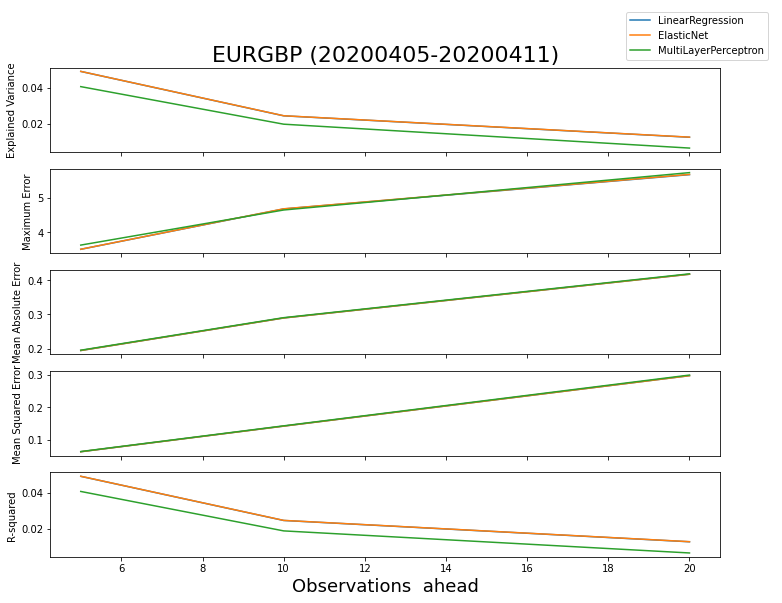

                  model n_past n_fut  Explained Variance  Maximum Error  \
0      LinearRegression    200     5            0.049039       3.514648   
1      LinearRegression    200    20            0.012612       5.669651   
2      LinearRegression    200    10            0.024469       4.680339   
3            ElasticNet    200    20            0.012670       5.676823   
4            ElasticNet    200    10            0.024516       4.683870   
5            ElasticNet    200     5            0.049056       3.515781   
6  MultiLayerPerceptron    200    10            0.019838       4.649073   
7  MultiLayerPerceptron    200    20            0.006615       5.728445   
8  MultiLayerPerceptron    200     5            0.040628       3.636104   

   Mean Absolute Error  Mean Squared Error  R-squared  
0             0.194260            0.063048   0.049038  
1             0.418204            0.297177   0.012611  
2             0.289764            0.141898   0.024468  
3             0.418176   

<Figure size 432x288 with 0 Axes>

In [11]:
plotter.get_results()